In [361]:
import pandas as pd
ticker=input("enter symbol of stock you want to analyse : ")

df = pd.read_csv("./dataset/CSV/"+ticker+".csv")
df= df.drop(['Low', 'High','Volume','Adjusted Close'], axis=1)
df
df['Stock Ticker']=[ticker]*len(df.index)

enter symbol of stock you want to analyse : AAP


In [362]:
df['50dayEWM'] = df['Open'].ewm(span=50, adjust=False).mean()
df['200dayEWM'] = df['Open'].ewm(span=200, adjust=False).mean()


In [363]:
def rsi(df, periods = 12, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
df['rsi']=rsi(df)

In [364]:
df

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
0,29-11-2001,13.386667,13.880000,AAP,13.386667,13.386667,NaN
1,30-11-2001,13.880000,14.266667,AAP,13.406014,13.391576,NaN
2,03-12-2001,14.233333,13.783333,AAP,13.438458,13.399952,NaN
3,04-12-2001,13.783333,13.233333,AAP,13.451982,13.403766,NaN
4,05-12-2001,13.433333,14.666667,AAP,13.451251,13.404061,NaN
...,...,...,...,...,...,...,...
5291,06-12-2022,147.960007,145.529999,AAP,166.450291,184.177615,30.629435
5292,07-12-2022,145.149994,146.649994,AAP,165.614986,183.789280,32.828525
5293,08-12-2022,146.369995,146.589996,AAP,164.860280,183.416949,32.767820
5294,09-12-2022,145.229996,145.899994,AAP,164.090465,183.036979,32.024865


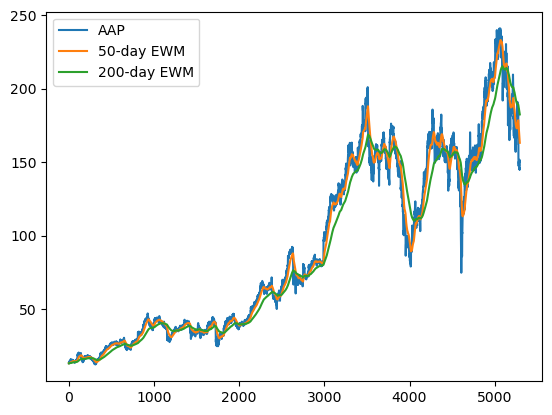

In [365]:
import matplotlib.pyplot as plt

plt.plot(df['Open'], label=ticker)
plt.plot(df['50dayEWM'], label='50-day EWM')
plt.plot(df['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)



In [369]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
crossing = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200))
            | ((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))

In [370]:
crossing_dates = df.loc[crossing]
print(crossing_dates)

           Date        Open       Close Stock Ticker    50dayEWM   200dayEWM  \
1    2001-11-30   13.880000   14.266667          AAP   13.406014   13.391576   
278  2003-08-01   15.403333   15.303333          AAP   16.829047   16.862328   
363  2003-12-05   17.783333   18.023333          AAP   15.867779   15.843046   
677  2004-10-08   23.133333   23.526667          AAP   26.195302   26.210929   
746  2004-11-16   28.066668   28.033333          AAP   25.549736   25.518494   
1123 2006-05-17   38.340000   38.200001          AAP   40.351508   40.388097   
1259 2006-11-29   36.650002   34.830002          AAP   35.680503   35.661814   
1260 2006-11-30   34.910000   35.599998          AAP   35.650287   35.654333   
1265 2006-07-12   37.009998   37.009998          AAP   35.700688   35.666436   
1432 2007-09-08   31.230000   30.309999          AAP   38.227707   38.393826   
1528 2007-12-26   38.250000   38.610001          AAP   36.458702   36.446463   
1540 2008-01-14   31.160000   31.910000 

In [371]:
df['Date'] = pd.to_datetime(df['Date'])

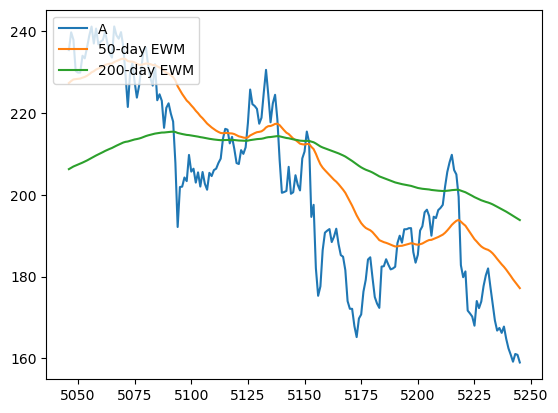

In [372]:
x=crossing_dates.index[-1]-100
y=crossing_dates.index[-1]+100
df1= df.iloc[x:y]
df1
plt.plot(df1['Open'], label='A')
plt.plot(df1['50dayEWM'], label='50-day EWM')
plt.plot(df1['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)

In [373]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
buys = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200)))

In [374]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
sells = (((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))


In [375]:
buy_dates = df.loc[buys]
sell_dates = df.loc[sells]
buy_dates

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
278,2003-08-01,15.403333,15.303333,AAP,16.829047,16.862328,32.643769
677,2004-10-08,23.133333,23.526667,AAP,26.195302,26.210929,35.938699
1123,2006-05-17,38.340000,38.200001,AAP,40.351508,40.388097,36.775506
1260,2006-11-30,34.910000,35.599998,AAP,35.650287,35.654333,41.234288
1432,2007-09-08,31.230000,30.309999,AAP,38.227707,38.393826,14.060942
1540,2008-01-14,31.160000,31.910000,AAP,36.279363,36.418731,24.681100
1730,2008-10-14,29.280001,27.830000,AAP,38.101105,38.110116,23.614148
1987,2009-10-21,38.410000,37.459999,AAP,40.232247,40.235269,35.548914
2050,2010-01-22,39.130001,39.740002,AAP,39.948116,39.966067,46.233537
2414,2011-01-07,58.439999,59.099998,AAP,61.151689,61.217796,48.021342


In [376]:
buyindex=df.index[buys].tolist()
print(buyindex)
buy_dates
profit=0
loss=0
profits=[]
rsi_list=[]
for i in buyindex:
    if i>200 and df.loc[i]['Open'] !=0:
        buy=df.loc[i]['Open']
        rsi_list.append(df.loc[i]['rsi'])
        print("-----")

        for j in range(i,i+265):
            
            p=df.loc[j]['Open']-buy
            if p/buy<-0.1:
                print(buy,df.loc[j]['Open'],p,j-i,df.loc[i]['rsi'])
                
                print("stoploss hit")
                loss=loss+1
                profits.append(p/buy)
                break
            elif p/buy>0.1:
                print(buy,df.loc[j]['Open'],p,j-i,df.loc[i]['rsi'])
                profit=profit+1
                profits.append(p/buy)
                break
        print(j-i)
        if j-i==264:
            if buy<df.loc[j]['Open']:
                print(buy,df.loc[j]['Open'],p,j-i)
                profit=profit+1
                profit.append((df.loc[j]['Open']-buy)/buy)
            else :
                print(buy,df.loc[j]['Open'],p,j-i)
                print("yearend exit")
                profit.append((df.loc[j]['Open']-buy)/buy)
                loss=loss+1
        


                
        



[278, 677, 1123, 1260, 1432, 1540, 1730, 1987, 2050, 2414, 2665, 2800, 3542, 3727, 3851, 4125, 4423, 4562, 5146]
-----
15.403332710266112 13.43333339691162 -1.9699993133544922 21 32.64376902125737
stoploss hit
21
-----
23.13333320617676 25.53333282470703 2.39999961853027 50 35.938698579150824
50
-----
38.34000015258789 29.270000457763672 -9.069999694824219 30 36.77550635713634
stoploss hit
30
-----
34.90999984741211 38.95000076293945 4.040000915527344 47 41.23428846745059
47
-----
31.229999542236328 35.0 3.770000457763672 12 14.060942179772752
12
-----
31.15999984741211 34.63999938964844 3.479999542236328 8 24.68109985777275
8
-----
29.280000686645508 25.350000381469727 -3.9300003051757812 2 23.61414761261628
stoploss hit
2
-----
38.40999984741211 42.40999984741211 4.0 77 35.548914276054816
77
-----
39.130001068115234 43.2599983215332 4.129997253417969 39 46.233537207754765
39
-----
58.43999862670898 51.93000030517578 -6.509998321533196 25 48.02134229987156
stoploss hit
25
-----
66.410

In [377]:
print(profit,loss)

11 8


In [378]:
print(profits)
print(rsi_list)

[-0.1278943557481891, 0.10374638177473937, -0.23656754456773282, 0.1157261796959541, 0.12071727547305973, 0.11168162898836946, -0.13422131875045476, 0.10413954740667623, 0.10554554410128202, -0.11139627779795866, 0.11353701054581933, 0.10351019624919737, 0.11174809455509845, 0.1003018895816512, -0.1392612192007148, 0.10619301324853651, -0.12852284467184708, -0.10188531425729697, -0.11094285222310483]
[32.64376902125737, 35.938698579150824, 36.77550635713634, 41.23428846745059, 14.060942179772752, 24.68109985777275, 23.61414761261628, 35.548914276054816, 46.233537207754765, 48.02134229987156, 42.16311059303891, 57.570971975461305, 37.37935920671501, 24.017210192981537, 32.773384857399236, 33.26321621188721, 43.322456193753176, 39.436321474498065, 40.706470897389046]


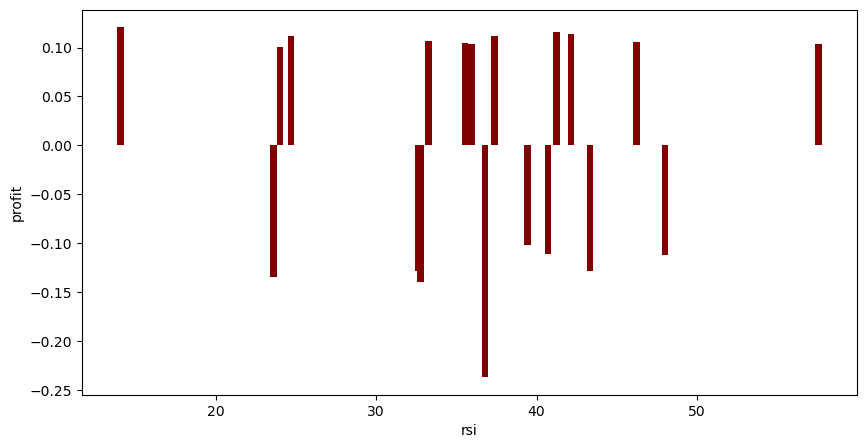

In [379]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(rsi_list, profits, color ='maroon',
        width = 0.4)
 
plt.xlabel("rsi")
plt.ylabel("profit")
plt.show()

In [380]:
cap=1
for i in profits:
    cap=cap*(1+i)
print(cap)

0.9553835770602053
